In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay




In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape(train_images.shape[0],28*28)
test_images = test_images.reshape(test_images.shape[0],28*28)

In [4]:
train_images.shape

(60000, 784)

In [5]:
test_images.shape

(10000, 784)

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
pipe = Pipeline([('scaler',MinMaxScaler()) , ('classifier', SVC(kernel='rbf', C = 1) )])
pipe.fit(train_images,train_labels.ravel())
predict_test = pipe.predict(test_images)

0.8829
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



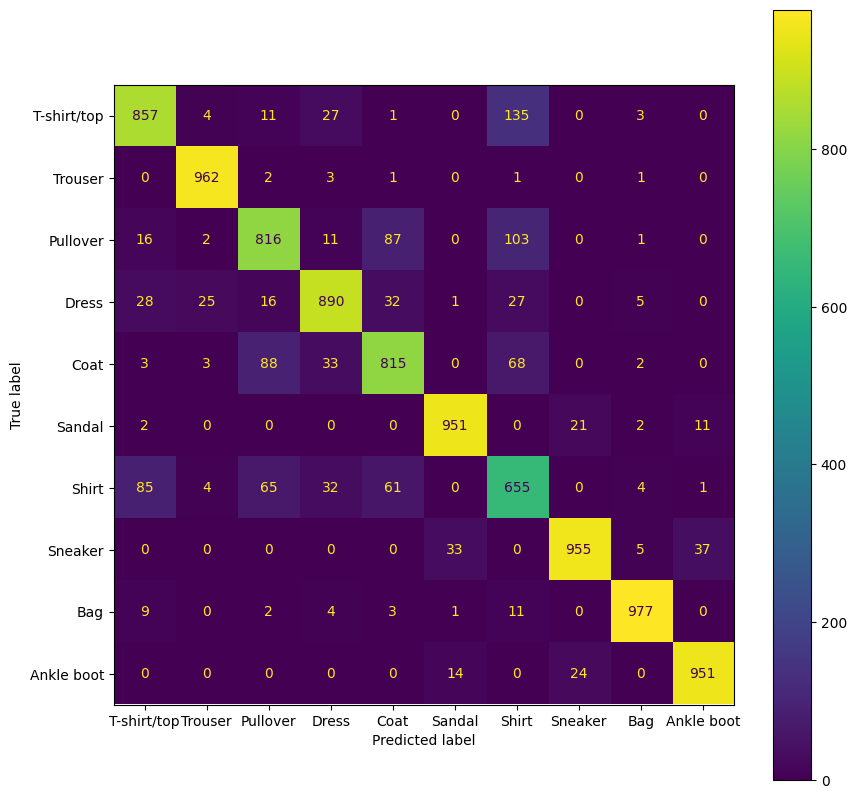

In [8]:

print(accuracy_score(test_labels, predict_test))
print(classification_report(test_labels, predict_test))

label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
cm=confusion_matrix(predict_test,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);